
# Descomposición en Valores Singulares (SVD)

2.1. Geometría de los Operadores Lineales

En el desafío de código, vimos que un círculo unitario es transformado por una matriz cuadrada $ \mathbf{A} $ en una elipse. Resulta que el efecto de una matriz cuadrada $ \mathbf{A} \in \mathbb{R}^{2 \times 2} $ como operador en $ \mathbb{R}^2 $ es dilatar el espacio en dos direcciones ortogonales (posiblemente algunas direcciones se reducen a cero, pero nunca en una dirección negativa), y luego el espacio resultante es rotado dos veces. Para ver esto, sea $ \mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top $ la SVD de $ \mathbf{A} $, entonces $ \mathbf{A} = (\mathbf{U} \mathbf{V}^\top) (\mathbf{V} \mathbf{\Sigma} \mathbf{V}^\top) $.

El factor $ \mathbf{V} \mathbf{\Sigma} \mathbf{V}^\top $ dilata el espacio en dos direcciones ortogonales definidas por las columnas de $ \mathbf{V} $, mientras que la magnitud de la dilatación está determinada por los valores singulares en la diagonal de $ \mathbf{\Sigma} $. Podemos interpretar $ \mathbf{V} $ y $ \mathbf{V}^\top $ como matrices de cambio de base, es decir, en términos de una suma de operadores de proyección $ \sum_{i=1}^n \sigma_i \mathbf{v}_i \mathbf{v}_i^\top $. Esto es seguido por un producto $ \mathbf{U} \mathbf{V}^\top $ de dos isometrías de $ \mathbb{R}^2 $. Se puede calcular fácilmente que las transformaciones ortogonales de $ \mathbb{R}^2 $ son ya sea rotaciones o reflexiones, de modo que obtenemos una elipse final. Dado que el rango de $ \mathbf{A} $ es igual al número de valores singulares no nulos, siempre que $ \mathbf{A} $ sea singular, algunos de sus valores singulares serán cero, correspondiendo a un eje donde la elipse colapsa.

### Actividad: Implementar un script en Python para verificar las condiciones bajo las cuales el producto de dos matrices simétricas $ \mathbf{S} $ y $ \mathbf{T} $ es simétrico.



In [1]:
import numpy as np

def es_producto_simetrico(S, T):
    producto = np.dot(S, T)
    return np.allclose(producto, producto.T)

S = np.array([[2, 3], [3, 4]])
T = np.array([[1, 2], [2, 1]])

print("¿Es el producto S*T simétrico?", es_producto_simetrico(S, T))

¿Es el producto S*T simétrico? False


(2.2) **Descomposición Polar.** La descomposición de un operador $ \mathbf{A} \in \mathbb{R}^{n \times n} $ en $ \mathbf{A} = \mathbf{Q} \mathbf{P} $ donde $ \mathbf{Q} $ es ortogonal y $ \mathbf{P} $ es simétrica y semidefinida positiva se llama **descomposición polar**. Geométricamente, podemos ver que $ \mathbf{P} $ debería ser única. De hecho, observe que $ \mathbf{P}^2 = \mathbf{A}^\top \mathbf{A} $ y $ \mathbf{A}^\top \mathbf{A} $ es evidentemente simétrica y semidefinida positiva, por lo que tiene una raíz cuadrada simétrica y semidefinida positiva única $ \sqrt{\mathbf{A}^\top \mathbf{A}} $ [[Teorema 3]](https://www.math.drexel.edu/~foucart/TeachingFiles/F12/M504Lect7.pdf). Así, $ \mathbf{P} = \mathbf{V} \mathbf{\Sigma} \mathbf{V}^\top = \sqrt{\mathbf{A}^\top \mathbf{A}} $ por unicidad. Sin embargo, note que los autovectores de la descomposición ortogonal no necesitan ser únicos (por ejemplo, cuando el núcleo de $ \mathbf{A} $ es no nulo). Para matrices reales, las isometrías son precisamente las matrices ortogonales. Por lo tanto, la descomposición polar se puede escribir como $ \mathbf{A} = \mathbf{Q} \sqrt{\mathbf{A}^\top \mathbf{A}} $ para alguna isometría $ \mathbf{Q} $; cf. [[Lema 9.6]](https://www.maa.org/sites/default/files/pdf/awards/Axler-Ford-1996.pdf) que establece la descomposición polar en términos de la existencia de dicha isometría. La matriz $ \mathbf{Q} $ es única solo si $ \mathbf{A} $ es no singular. Por ejemplo, si $ \mathbf{A} $ es singular, entonces podemos reflejar a través del eje donde el espacio colapsa y aún obtener la misma transformación.

**Comentario.** El nombre "descomposición polar" proviene de la descomposición análoga de números complejos como $ z = re^{i\theta} $ en coordenadas polares. Aquí $ r = \sqrt{\bar{z}z} $ (análogo a $ \sqrt{\mathbf{A}^* \mathbf{A}} $) y la multiplicación por $ e^{i\theta} $ es una isometría de $ \mathbb{C} $ (análogo a la propiedad isométrica de $ \mathbf{Q} $). Para matrices complejas consideramos $ \mathbf{A}^*\mathbf{A} $ y matrices unitarias en la SVD.

---

(2.3) **Cálculo de la descomposición polar.** En la siguiente celda de código, verificamos la teoría calculando la descomposición polar a partir de `u, s, vT = np.linalg.svd(A)`. Establecemos `Q = u @ vT` y `P = vT.T @ np.diag(s) @ vT`. Algunos valores singulares son cero para $ \mathbf{A} $ singular (izquierda) mientras que todos son no nulos para $ \mathbf{A} $ no singular (derecha). Los autovectores de `P` se escalan por los autovalores correspondientes y luego se rotan con `Q`. Los autovectores rotados de `P` se alinean a lo largo de los ejes mayor y menor de la elipse: las direcciones donde el círculo se estira antes de la rotación. El código verifica que los autovectores (obtenidos de SVD) se alinean bien a lo largo de los ejes donde el círculo se alarga en el gráfico de dispersión (obtenido al trazar los vectores de salida `A @ [x, y]` donde `[x, y]` es un punto en el círculo unitario).

### Código en Python para calcular la descomposición polar:


In [15]:

import numpy as np

def descomposicion_polar(A):
    U, Sigma, Vt = np.linalg.svd(A)
    Q = np.dot(U, Vt)
    P = np.dot(Vt.T, np.dot(np.diag(Sigma), Vt))
    return Q, P


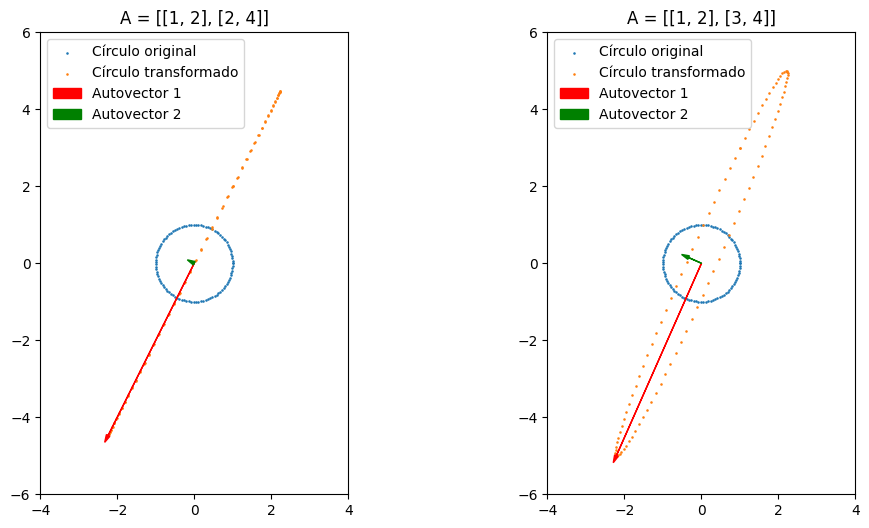

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir matrices de ejemplo
S = np.array([[1, 2], [2, 4]])
T = np.array([[1, 2], [3, 4]])
matrices = [S, T]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in [0, 1]:
    A = matrices[i]
    
    # Círculo unitario
    t = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(t)
    y = np.sin(t)

    # Transformar el círculo unitario
    Ax = A[0, :] @ np.vstack([x, y])
    Ay = A[1, :] @ np.vstack([x, y])
    
    # Graficar el círculo original y el transformado
    ax[i].scatter(x, y, s=0.7, label='Círculo original')
    ax[i].scatter(Ax, Ay, s=0.7, label='Círculo transformado')
    ax[i].axis('scaled')
    ax[i].set_ylim(-6, 6)
    ax[i].set_xlim(-4, 4)

    # Obtener Q y P a partir de la SVD
    u, s, vT = np.linalg.svd(A)
    Q = u @ vT
    P = vT.T @ np.diag(s) @ vT

    # Obtener autovectores -> escalar por valores singulares -> rotar -> graficar
    autovalores = s
    autovectores = vT.T
    ax[i].arrow(0, 0, autovalores[0] * (Q @ autovectores[:, 0])[0], autovalores[0] * (Q @ autovectores[:, 0])[1],
                head_width=0.1, head_length=0.2, fc='r', ec='r', label='Autovector 1')
    ax[i].arrow(0, 0, autovalores[1] * (Q @ autovectores[:, 1])[0], autovalores[1] * (Q @ autovectores[:, 1])[1],
                head_width=0.1, head_length=0.2, fc='g', ec='g', label='Autovector 2')
    
    ax[i].set_title(f'A = {A.tolist()}')
    ax[i].legend()

plt.show()


### (2.4) **Demostración de SVD**

La Descomposición en Valores Singulares (SVD) establece que cualquier matriz real $\mathbf A \in \mathbb{R}^{m \times n}$ puede descomponerse como $\mathbf A = \mathbf U \mathbf \Sigma \mathbf V^\top$, donde $\mathbf U \in \mathbb{R}^{m \times m}$ y $\mathbf V \in \mathbb{R}^{n \times n}$ son matrices ortogonales, y $\mathbf \Sigma \in \mathbb{R}^{m \times n}$ es una matriz diagonal con números reales no negativos en la diagonal. Los elementos diagonales $\sigma_i$ de $\mathbf \Sigma$ se llaman **valores singulares** de $\mathbf A$. El número $r$ de valores singulares no nulos es igual al rango de $\mathbf A$, como veremos a continuación.

La siguiente demostración de la SVD es constructiva, es decir, construimos los valores singulares y los vectores singulares izquierdo y derecho de $\mathbf A$. Supongamos que $r = \text{rank } \mathbf A$, entonces $r \leq \min(m, n)$. Observe que $\mathbf A^\top \mathbf A \in \mathbb{R}^{n \times n}$ es una matriz simétrica y semidefinida positiva. Por lo tanto, los valores propios de $\mathbf A^\top \mathbf A$ son no negativos y existe una descomposición en valores propios $\mathbf A^\top \mathbf A = \mathbf V \mathbf \Sigma^2 \mathbf V^\top$, donde $\mathbf V$ es una matriz ortogonal y $\mathbf \Sigma^2$ es una matriz diagonal con los valores propios reales de $\mathbf A^\top \mathbf A$. Aquí definimos $\sigma_i = \mathbf \Sigma_{ii}$ tal que $\sigma_1 \geq \sigma_2 \geq \ldots \sigma_r > 0$, donde $r = \text{rank }\mathbf A$. Esto se debe a que $\text{rank }\mathbf A^\top \mathbf A = \text{rank }\mathbf A = r$, y $\mathbf A^\top \mathbf A$ es similar a $\mathbf \Sigma^2$, por lo que los primeros $r$ valores singulares de $\mathbf A$ son no nulos, mientras que el resto son ceros. Los valores singulares caracterizan la geometría de $\mathbf A$. Por ejemplo, si $0 \leq r < m$, entonces la hipérbola imagen de $\mathbf A$ colapsa y tiene volumen cero. Los vectores $\mathbf v_1, \ldots, \mathbf v_n$ forman una base ortonormal para $\mathbb{R}^n$, y los llamamos **vectores singulares derechos**. Ahora que hemos terminado con el dominio de $\mathbf A$, procedemos a su codominio.

Sabemos que $\mathbf A \mathbf v_i$ para $i = 1, 2, \ldots, n$ abarcan la imagen de $\mathbf A$. Para $i = 1, 2, \ldots, r$, se puede demostrar que $\lVert \mathbf A \mathbf v_i \rVert = \sigma_i$. Dado que los primeros $r$ valores singulares son no nulos, podemos definir los vectores unitarios $\mathbf u_i = {\sigma_i}^{-1}\mathbf A \mathbf v_i \in \mathbb{R}^m$ para $i = 1, \ldots, r$. Estos son los **vectores singulares izquierdos** de $\mathbf A$. Se sigue que $\mathbf A \mathbf v_i = \sigma_i \mathbf u_i$ para $i = 1, \ldots, r$ y $\mathbf A \mathbf v_i = \mathbf 0$ para $i > r$. Observe que los vectores $\mathbf u_i$ son ortogonales:

$$
\mathbf u_i^\top \mathbf u_j = \frac{1}{\sigma_i\sigma_j}\mathbf v_i^\top\mathbf A^\top \mathbf A \mathbf v_j = \frac{1}{\sigma_i\sigma_j}\mathbf v_i^\top {\sigma_j}^2 \mathbf v_j = \delta_{ij} \frac{{\sigma_j}^2}{\sigma_i\sigma_j} = \delta_{ij}.
$$

Por lo tanto, $\mathbf u_1, \ldots \mathbf u_r$ es una base ortonormal para la imagen de $\mathbf A$ en $\mathbb{R}^m$. A partir de aquí, ya podemos obtener la **SVD compacta**, que ya contiene toda la información necesaria: $\mathbf A = \sum_{k=1}^r \sigma_k \mathbf u_k \mathbf v_k^\top$ o $\mathbf A = \mathbf U_r \mathbf \Sigma_r \mathbf V_r^\top$, donde $\mathbf U_r = [\mathbf u_1, \ldots, \mathbf u_r] \in \mathbb{R}^{m \times r}$, $\mathbf \Sigma_r = \mathbf \Sigma[:r, :r]$, y $\mathbf V^\top_r = \mathbf V[:, :r]^\top$. Para obtener la **SVD completa**, extendemos $\mathbf U_r$ a una base ortonormal de $\mathbb{R}^m$ mediante Gram-Schmidt, obteniendo $\mathbf U = [\mathbf U_r | \mathbf U_{m-r}] \in \mathbb{R}^{m \times m}$. Para $\mathbf \Sigma$, ya sea que agreguemos filas de ceros ($m > n$) o eliminemos filas de ceros ($m < n$) para obtener una matriz diagonal $m \times n$. Finalmente, con estas matrices, podemos escribir $\mathbf A \mathbf V = \mathbf U \mathbf \Sigma$, de modo que $\mathbf A = \mathbf U \mathbf \Sigma \mathbf V^\top$, donde los factores tienen las propiedades indicadas en la SVD. □



In [6]:

# <br>
#   <p align="center">
#   <img src="../img/svd.png" alt="drawing" width="400"/>
#   </p>
# <br>


In [7]:
import numpy as np

# Configurar la semilla para reproducibilidad
np.random.seed(0)

# Generar una matriz A aleatoria de tamaño 5x4
A = np.random.randn(5, 4)

# Calcular A^T * A, que será una matriz simétrica de 4x4
B = A.T @ A

# Calcular los valores y vectores propios de B, ordenados en orden descendente
valores_propios, vectores_propios = np.linalg.eig(B)
vectores_propios = vectores_propios[:, np.argsort(-valores_propios)]
valores_propios = -np.sort(-valores_propios)

# SVD compacta (sin usar Gram-Schmidt directamente)
Sigma = np.zeros((A.shape[1], A.shape[1]))  # Matriz diagonal Sigma de 4x4
U = np.zeros((A.shape[0], A.shape[1]))      # Matriz U de 5x4
V = vectores_propios[:, :A.shape[1]]        # Matriz V de 4x4 (vectores propios de B)

# Construcción de las matrices Sigma y U
for i in range(len(valores_propios)):
    Sigma[i, i] = np.sqrt(valores_propios[i])
    U[:, i] = A @ vectores_propios[:, i] / np.sqrt(valores_propios[i])

# Imprimir los resultados
print('\nA=')
print(np.round(A, 4))

print('\nU @ Sigma @ V.T =') 
print(np.round(U @ Sigma @ V.T, 4))

print('\nNormas de Frobenius:')
print('|| A - U @ Sigma @ V.T || =', np.linalg.norm(U @ Sigma @ V.T - A))
print('|| V.T @ V - I || =', np.linalg.norm(V.T @ V - np.eye(4)))
print('|| U.T @ U - I || =', np.linalg.norm(U.T @ U - np.eye(4)))



A=
[[ 1.7641  0.4002  0.9787  2.2409]
 [ 1.8676 -0.9773  0.9501 -0.1514]
 [-0.1032  0.4106  0.144   1.4543]
 [ 0.761   0.1217  0.4439  0.3337]
 [ 1.4941 -0.2052  0.3131 -0.8541]]

U @ Sigma @ V.T =
[[ 1.7641  0.4002  0.9787  2.2409]
 [ 1.8676 -0.9773  0.9501 -0.1514]
 [-0.1032  0.4106  0.144   1.4543]
 [ 0.761   0.1217  0.4439  0.3337]
 [ 1.4941 -0.2052  0.3131 -0.8541]]

Normas de Frobenius:
|| A - U @ Sigma @ V.T || = 2.4549567358654157e-15
|| V.T @ V - I || = 2.203452729017052e-15
|| U.T @ U - I || = 1.269111885442483e-14


### Vectores singulares en la SVD (Descomposición en Valores Singulares)

En la descomposición en valores singulares (SVD), cualquier matriz real $\mathbf{A} \in \mathbb{R}^{m \times n}$ se puede escribir como:

$$
\mathbf{A} = \sum_{i=1}^r \sigma_i \mathbf{u}_i \mathbf{v}_i^\top
$$

donde $r$ es el rango de $\mathbf{A}$, $\sigma_i$ son los valores singulares, $\mathbf{u}_i$ son los vectores singulares izquierdos, y $\mathbf{v}_i$ son los vectores singulares derechos. Esta fórmula representa a $\mathbf{A}$ como una suma de términos de rango uno. Cada término $\sigma_i \mathbf{u}_i \mathbf{v}_i^\top$ es una matriz de rango uno que contribuye a la estructura de $\mathbf{A}$.

#### Interpretación Geométrica

Recordemos que $\sigma_i \mathbf{u}_i = \mathbf{A} \mathbf{v}_i$, lo que significa que podemos escribir $\mathbf{A}$ como:

$$
\mathbf{A} = \sum_{i=1}^r (\mathbf{A} \mathbf{v}_i) \mathbf{v}_i^\top
$$

Esto es trivial si consideramos que $\mathbf{v}_1, \ldots, \mathbf{v}_n$ forman una base ortonormal (ONB) en $\mathbb{R}^n$. Sin embargo, lo que hace no trivial a la SVD es que:

1. Siempre existe una base ortonormal que es "natural" para $\mathbf{A}$. Esta base está compuesta por los vectores singulares derechos $\mathbf{v}_i$.
2. Los vectores $\mathbf{A} \mathbf{v}_i$, que forman la imagen de $\mathbf{A}$ y abarcan la columna de $\mathbf{A}$ ($\textsf{col} \mathbf{A}$), también son ortogonales en $\mathbb{R}^m$.

Esta propiedad es esencial porque implica que la SVD no solo descompone a $\mathbf{A}$ en componentes fundamentales, sino que también lo hace de manera que las direcciones principales de $\mathbf{A}$ en el dominio y el codominio son ortogonales, lo que facilita el análisis y la manipulación de la matriz.


<!-- 
  <p align="center">
  <img src="../img/svd_ellipse.png" alt="Source: http://gregorygundersen.com/image/svd/ellipse.png" width="400"/>
  </p>
 -->


#### Relación con los Valores Propios

Otra caracterización importante de los vectores singulares se da en términos de los valores propios de las matrices $\mathbf{A}^\top \mathbf{A}$ y $\mathbf{A} \mathbf{A}^\top$. Por construcción:

- Los vectores $\mathbf{v}_1, \ldots, \mathbf{v}_n$ son vectores propios de $\mathbf{A}^\top \mathbf{A}$ con respecto a los valores propios $\sigma_1^2, \ldots, \sigma_r^2, 0, \ldots, 0$.
- Por otro lado, se cumple que:

$$
\mathbf{A} \mathbf{A}^\top \mathbf{u}_i = \frac{1}{\sigma_i} \mathbf{A} \mathbf{A}^\top \mathbf{A} \mathbf{v}_i = \frac{1}{\sigma_i} \sigma_i^2 \mathbf{A} \mathbf{v}_i = \sigma_i^2 \mathbf{u}_i
$$

para $i = 1, \ldots, r$. Esto también es trivialmente cierto para $i > r$. Por lo tanto, los vectores $\mathbf{u}_1, \ldots, \mathbf{u}_m$ son vectores propios ortogonales de $\mathbf{A} \mathbf{A}^\top$ con respecto a los valores propios $\sigma_1^2, \ldots, \sigma_r^2, 0, \ldots, 0$.

<!-- 
  
  <p align="center">
  <img src="../img/svd_change_of_basis.svg" alt="drawing" width="400"/> 
  <b>Figure. </b> SVD as diagonalization.
  </p> -->


(2.7) **SVD as diagonalization.** We can think of the SVD as a change of basis so that the $m \times n$ matrix $\mathbf A$ has a diagonal representation (see Figure above). Recall that we recover the components of a vector in an ONB by performing projection, so we can replace inverses with transpose. In action: $\mathbf A = \mathbf U \mathbf U^\top \mathbf A \mathbf V \mathbf V^\top = \mathbf U \mathbf \Sigma \mathbf V^\top.$ Here $\mathbf U \mathbf U^\top = \sum_{i = 1}^m \mathbf u_i \mathbf {u_i}^\top$ is the change of basis of output vectors of $\mathbf \Sigma$ defined by the columns of $\mathbf U$ and, similarly, $\mathbf V \mathbf V^\top = \sum_{j = 1}^m \mathbf v_j \mathbf {v_j}^\top$ is the change of basis of input vectors of $\mathbf \Sigma$ defined by ONB of $\mathbb R^n$ that form the columns of $\mathbf V.$ Thus, the SVD is analogous to diagonalization for square matrices, but instead of eigenvalues, we diagonalize into an $m \times n$ diagonal matrix of singular values. From [Chapter 10](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/eigs.pdf) of [Moler, 2013]: 
  
  > In abstract linear algebra terms, eigenvalues are relevant if a square, $n$-by-$n$ matrix $\mathbf A$ is thought of as mapping $n$-dimensional space onto itself. We try to find a basis for the space so that the matrix becomes diagonal. This basis might be complex even if $\mathbf A$ is real. In fact, if the eigenvectors are not linearly independent, such a basis does not even exist. The SVD is relevant if a possibly rectangular, $m$-by-$n$ matrix $\mathbf A$ is thought of as mapping $n$-space onto $m$-space. We try to find one change of basis in the domain and a usually different change of basis in the range so that the matrix becomes diagonal. Such bases always exist and are always real if $\mathbf A$ is real. In fact, the transforming matrices are orthogonal or unitary, so they preserve lengths and angles and do not magnify errors.


(2.8) **Cálculo de la SVD.** En la siguiente celda, calculamos 3 cosas para una matriz aleatoria $\mathbf A[i, j] \sim \mathcal{N}(0, 1)$: 

(1) igualdad entre los valores propios de $\sqrt{\mathbf A^\top \mathbf A}$ y los valores singulares de $\mathbf A$; 

(2) diferencia entre el valor singular máximo $\sigma_1$ y $\max_{\lVert \mathbf x \rVert_2 = 1} \lVert \mathbf A \mathbf x \rVert_2$; y 

(3) si $\mathbf A\mathbf v_i = \sigma_i \mathbf u_i$ para $i = 1, 2.$

In [3]:
import numpy as np
rng = np.random.RandomState(0)

# Crear una matriz aleatoria A con valores distribuidos según N(0, 1)
A = rng.randn(2, 2)

# Calcular la SVD de A
u, s, vT = np.linalg.svd(A)

# Verificar que los valores propios de √(AᵀA) son iguales a los valores singulares de A
valores_propios = np.sqrt(np.linalg.eig(A.T @ A)[0])
print('λ(√AᵀA): ', -np.sort(-valores_propios))
print('σ(A):    ', s)

# Verificar que el valor singular máximo es igual a la dilatación máxima del círculo unitario
N = 1000  # Número de puntos en el círculo unitario
t = np.linspace(-1, 1, N)
circulo_unitario = np.stack([np.cos(2 * np.pi * t), np.sin(2 * np.pi * t)], axis=0)
salidas = A @ circulo_unitario
max_norma_salida = np.linalg.norm(salidas, axis=0).max()

# Verificar que Av = σu para los primeros dos vectores singulares
diferencia_Av_sigma_u = np.abs(u @ np.diag(s) - A @ vT.T).max()
print(f'| Av - σu |.max()   = {diferencia_Av_sigma_u:.3e}') 
print(f'σ₁ - max ‖Ax‖ / ‖x‖ = {abs(max_norma_salida - s[0]):.3e}')


λ(√AᵀA):  [2.75276951 1.29375301]
σ(A):     [2.75276951 1.29375301]
| Av - σu |.max()   = 2.220e-16
σ₁ - max ‖Ax‖ / ‖x‖ = 1.673e-07


<br>



**(2.9) Demostración del teorema espectral.** El teorema espectral es un resultado extremadamente elegante, que puede considerarse como la descomposición en valores singulares (SVD) para operadores lineales. De hecho, la construcción de la SVD se basa en una descomposición espectral, es decir, en la descomposición de $\mathbf A^\top \mathbf A$, que es automáticamente simétrica. 

Una propiedad clave de las matrices simétricas utilizada en la demostración es que si $ V $ es un subespacio, entonces $ V^\perp $ es invariante bajo la acción de $ \mathbf A $. Esto nos permitirá construir recursivamente las direcciones de los vectores propios de $ \mathbf A $. El teorema espectral real se generaliza a operadores autoadjuntos en espacios de producto interno reales, como se indica en el [[Teorema 8.3]](https://www.maa.org/sites/default/files/pdf/awards/Axler-Ford-1996.pdf).

> **Teorema.** (Teorema espectral real). Sea $ \mathbf A \in \mathbb R^{n \times n} $ una matriz simétrica. Entonces: 
> (1) Los valores propios de $ \mathbf A $ son reales; 
> (2) Los vectores propios de $ \mathbf A $ correspondientes a valores propios distintos son ortogonales; 
> (3) Existe una base ortonormal (ONB) de $ \mathbb R^n $ formada por los vectores propios de $ \mathbf A $. Esto permite la diagonalización $ \mathbf A = \sum_{k=1}^n \lambda_k \mathbf v_k {\mathbf v_k}^\top = \mathbf V \mathbf \Lambda \mathbf V^\top $, donde $ \mathbf V $ es una matriz ortogonal real con los vectores propios $ \mathbf v_1, \ldots, \mathbf v_n $ como columnas, y $ \mathbf \Lambda $ es una matriz diagonal real con los valores propios $ \lambda_1, \ldots, \lambda_n $.

**Demostración:** [Olver, 2018]. Omitimos las partes (1) y (2). Para demostrar (3), realizamos una inducción sobre $ n $. Para $ n = 1 $, esto es trivialmente cierto, con $ \mathbf A = [a] $ y $ \lambda = a \in \mathbb R $ con vector propio $ 1 $. Supongamos que $ n \geq 2 $ y que el teorema espectral es cierto para matrices simétricas en $ \mathbb R^{n-1} $. Por el [[Teorema Fundamental del Álgebra (FTA)]](https://math.libretexts.org/Bookshelves/Linear_Algebra/Book%3A_Linear_Algebra_(Schilling_Nachtergaele_and_Lankham)/07%3A_Eigenvalues_and_Eigenvectors/7.04%3A_Existence_of_Eigenvalues), existe al menos un valor propio $ \lambda $ de $ \mathbf A $, que sabemos que es real. Junto con $ \lambda $ viene un vector propio unitario no nulo $ \mathbf v \in \mathbb R^n $. Sea $ \mathbf v^\perp $ el subespacio ortogonal al subespacio unidimensional generado por $ \mathbf v $. Entonces, $ \dim (\mathbf v^\perp) = n-1 $, de modo que $ \mathbf v^\perp $ tiene una base ortonormal $ \mathbf y_1, \ldots, \mathbf y_{n-1} $ en $ \mathbb R^n $. Además, $ \mathbf v^\perp $ es invariante bajo la acción de $ \mathbf A $ como consecuencia de la simetría.

Supongamos que $ \mathbf w \in \mathbf v^\perp $, entonces:

$$
\begin{aligned}
(\mathbf A \mathbf w)^\top \mathbf v 
&= \mathbf w^\top \mathbf A^\top \mathbf v  \\
&= \mathbf w^\top \mathbf A \mathbf v \\
&= \lambda \mathbf w^\top \mathbf v = 0.
\end{aligned}
$$

Esto significa que $ \mathbf A \mathbf w \in \mathbf v^\perp $. Por lo tanto, la restricción $ \mathbf A|_{\mathbf v^\perp} $ de $ \mathbf A $ en $ \mathbf v^\perp $ está bien definida, y podemos escribir $ \mathbf A|_{\mathbf v^\perp} = \mathbf Y \mathbf B \mathbf Y^\top $, donde $ \mathbf Y = [\mathbf y_1, \ldots , \mathbf y_{n-1}] \in \mathbb R^{n \times (n-1)} $ y $ \mathbf B \in \mathbb R^{(n-1) \times (n-1)} $ es la representación en coordenadas de $ \mathbf A|_{\mathbf v^\perp} $, es decir, $ \mathbf B = \mathbf Y^\top \mathbf A \mathbf Y $. Observa que $ \mathbf B $ es simétrica:

$$
b_{ij} = {\mathbf y_i}^\top \mathbf A \mathbf y_j = (\mathbf A^\top \mathbf y_i)^\top \mathbf y_j = (\mathbf A \mathbf y_i)^\top \mathbf y_j = b_{ji}.
$$

Por la hipótesis inductiva, $ \mathbf B $ tiene una descomposición espectral en términos de valores propios reales $ \omega_1, \ldots, \omega_{n-1} $ y vectores propios ortonormales $ \mathbf u_1, \ldots, \mathbf u_{n-1} $, de modo que $ \mathbf B = \mathbf U \mathbf \Omega \mathbf U^\top $, donde $ \mathbf \Omega = \text{diag}(\omega_1, \ldots, \omega_{n-1}) $ es una matriz diagonal de valores propios reales $ \omega_1, \ldots, \omega_{n-1} $, y $ \mathbf U = [\mathbf u_1, \ldots, \mathbf u_{n-1}] \in \mathbb R^{(n-1) \times (n-1)} $ es ortogonal. Así:

$$
\mathbf A|_{\mathbf v^\perp} = (\mathbf Y \mathbf U) \mathbf \Omega (\mathbf Y \mathbf U)^\top.
$$

Sea $ \mathbf w_j = \sum_{k=1}^{n-1} u_{kj} \mathbf y_k = \mathbf Y \mathbf u_j \in \mathbf v^\perp $ para $ j = 1, \ldots, n-1 $. Utilizamos el hecho sorprendente de que el producto interior de los vectores $ \mathbf w_i $ y $ \mathbf w_j $, representados bajo una base ortonormal $ \mathbf y_1, \ldots, \mathbf y_{n-1} $, se reduce al producto interior de sus vectores de coordenadas $ \mathbf u_i $ y $ \mathbf u_j $, que son ortonormales por la hipótesis inductiva. Es decir:

$$
{\mathbf w_i}^\top \mathbf w_j = {(\mathbf Y \mathbf u_i)}^\top {\mathbf Y \mathbf u_j} = {\mathbf u_i}^\top \mathbf Y^\top \mathbf Y \mathbf u_j = \delta_{ij}.
$$

Por lo tanto, $ \mathbf w_1, \ldots, \mathbf w_{n-1} $ es una base ortonormal para $ \mathbf v^\perp $. Dado que $ \mathbf v \perp \mathbf w_j $ para $ j=1, \ldots, n-1 $, por maximalidad (1) $ \mathbf v, \mathbf w_1 \ldots, \mathbf w_{n-1} $ es una base ortonormal de $ \mathbb R^n $. Además, (2) $ \mathbf A \mathbf v = \lambda \mathbf v $ y $ \mathbf A \mathbf w_j = \omega_j \mathbf w_j $ para $ j=1, \ldots, n-1 $. Estos dos hechos nos permiten escribir:

$$
\begin{aligned}
\mathbf A
&= \lambda \mathbf v \mathbf v^\top + \sum_{j=1}^{n-1}\omega_j \mathbf w_j{\mathbf w_j}^\top \\
&= \Bigg[\mathbf v\; \mathbf w_1 \ldots \; \mathbf w_{n-1}\Bigg] \begin{bmatrix}
  \lambda & & \\ 
    & \omega_1 & & \\ 
    &   &  \ddots & \\
    &   &  & \omega_{n-1}
\end{bmatrix}
\begin{bmatrix}
\mathbf v^\top \\
{\mathbf w_1}^\top \\ 
\

vdots
\\
{\mathbf w_{n-1}}^\top
\end{bmatrix}.
\end{aligned}
$$

Observa que (1) permitió una representación en coordenadas $ \mathbf A = \mathbf V \mathbf \Omega \mathbf V^\top $, donde $ \mathbf V $ es ortogonal, y (2) garantizó que $ \mathbf \Omega $ sea diagonal. ¡Esto completa la demostración! □




**(2.10) Demostración en código: prueba del teorema espectral.** En la siguiente celda de código, implementamos la construcción descrita anteriormente para obtener una base ortonormal de vectores propios para $\mathbb{R}^n$ con $n = 3$ respecto a una matriz simétrica generada aleatoriamente `A`. El primer vector propio $\mathbf{v}$ se obtiene utilizando la función `np.linalg.eig` de NumPy. Luego, construimos dos vectores linealmente independientes $\mathbf{y}_1$ y $\mathbf{y}_2$ calculando la ecuación del plano ortogonal a $\mathbf{v}$ y encontrando los valores de $x$ tales que $(x, 1, 1)$ y $(x, 1, 0)$ sean puntos en el plano $\mathbf{v}^\perp$. Finalmente, ortonormalizamos los vectores $\mathbf{y}_1$ y $\mathbf{y}_2$ usando el proceso de Gram-Schmidt. Según la hipótesis inductiva, calculamos `omega, U = np.linalg.eig(B)` donde `B = Y.T @ A @ Y`. Luego, definimos `W = Y @ U` como las direcciones de los $n-1$ vectores propios en el plano ortogonal. Esto se concatena con $\mathbf{v}$ para obtener la matriz final `V` de todos los $n$ vectores propios. Los valores propios se construyen de manera similar, en orden decreciente.


In [9]:
import numpy as np
np.random.seed(0)

# Generamos una matriz simétrica aleatoria
A = np.random.randn(3, 3)
A = A.T @ A  # A es ahora simétrica

# Calculamos un par valor propio-vector propio usando numpy
valores_propios, vectores_propios = np.linalg.eig(A)
λ1 = valores_propios[0]
v1 = vectores_propios[:, 0]  # Ya está normalizado; define un subespacio de dimensión 1

# Ahora queremos encontrar una base Y para el subespacio ortogonal a v1, es decir, (x, y, z) @ v1 = 0.
x1 = -(1 * v1[1] + 1 * v1[2]) / v1[0] 
y1 = np.array([x1, 1, 1], dtype=float)  # y = z = 1

x2 = -(1 * v1[1] + 0 * v1[2]) / v1[0] 
y2 = np.array([x2, 1, 0], dtype=float)  # y = 1, z = 0

# Ortonormalizamos y1 y y2 (Gram-Schmidt)
y1 = y1 / np.linalg.norm(y1)
y2 = y2 - y2.dot(y1) * y1 
y2 = y2 / np.linalg.norm(y2)

# Construimos la matriz B y calculamos su descomposición espectral
Y = np.stack([y1, y2], axis=1)
B = Y.T @ A @ Y 
ω, U = np.linalg.eig(B)
W = Y @ U  # Dimensiones: (n, n-1)

# Combinamos los valores y vectores propios de A
valores_finales = np.array([λ1] + list(ω))
V = np.stack([v1] + [W[:, i] for i in range(2)], axis=1)
V = V[:, np.argsort(-valores_finales)]
valores_finales = np.diag(-np.sort(-valores_finales))


In [10]:

# Imprimimos los resultados
print('A =')
print(A)
print('\nB =')
print(B)  # ¿Es simétrica?
print('\nV =')
print(V)
print('\nV.T @ V =')
print(V.T @ V)  # ¿Es ortogonal?
print('\nλ =', valores_finales.diagonal())
print('Error L1 (A, V @ λ @ V.T) =', np.abs(A - V @ valores_finales @ V.T).sum())
print('\nComparación con np.linalg.eig(A):')
print(np.linalg.eig(A)[0])
print(np.linalg.eig(A)[1])

A =
[[ 9.03615101  4.74709353 -0.56149735]
 [ 4.74709353  3.67080764 -1.41785114]
 [-0.56149735 -1.41785114  1.92365423]]

B =
[[ 0.37139617 -0.36034904]
 [-0.36034904  2.30840586]]

V =
[[-0.85231143  0.36198424  0.37753496]
 [-0.50914829 -0.40898848 -0.75729548]
 [ 0.11972159  0.83767287 -0.53288921]]

V.T @ V =
[[ 1.00000000e+00 -1.48290984e-17 -4.56876496e-17]
 [-1.48290984e-17  1.00000000e+00  2.59215955e-16]
 [-4.56876496e-17  2.59215955e-16  1.00000000e+00]]

λ = [11.95081085  2.37327078  0.30653125]
Error L1 (A, V @ λ @ V.T) = 2.6867397195928788e-14

Comparación con np.linalg.eig(A):
[11.95081085  2.37327078  0.30653125]
[[-0.85231143 -0.36198424 -0.37753496]
 [-0.50914829  0.40898848  0.75729548]
 [ 0.11972159 -0.83767287  0.53288921]]




(2.11) **Número de condición como medida de estabilidad.** El **número de condición** de una matriz es la razón entre su mayor y menor valor singular, es decir, $\kappa(\mathbf A) = \dfrac{\sigma_1}{\sigma_r}$, donde $r = \text{rango de } \mathbf A \geq 1.$ Recordemos que $\sigma_1$ es la máxima dilatación (estiramiento) mientras que $\sigma_r$ representa la mínima, para entradas de vector unitario. Consideremos $\mathbf A \mathbf x = \mathbf b$ y una perturbación $\delta\mathbf x$ en la entrada $\mathbf x.$ Por linealidad, tenemos:

$$
\mathbf A (\mathbf x + \delta\mathbf x) = \mathbf b + \delta \mathbf b
$$

donde $\delta\mathbf b = \mathbf A (\delta \mathbf x).$ Sabemos que $\lVert \mathbf b \rVert \leq \sigma_1 \lVert \mathbf x \rVert$ y que $\lVert \delta\mathbf b \rVert \geq \sigma_r \lVert \delta \mathbf x \rVert.$ Al dividir la desigualdad derecha por la izquierda, se mantiene la desigualdad:

$$
\dfrac{\lVert \delta\mathbf b \rVert}{\lVert \mathbf b \rVert} \kappa(\mathbf A) \geq \dfrac{\lVert \delta \mathbf x \rVert} {\lVert \mathbf x \rVert}.
$$

Así, la perturbación relativa en la entrada está acotada por la perturbación relativa en la salida multiplicada por el número de condición $\kappa(\mathbf A).$ Cambios en el lado derecho pueden causar cambios hasta $\kappa(\mathbf A)$ veces mayores en la solución. Es importante notar que las cantidades en la entrada y salida son adimensionales e independientes de la escala.

(2.12) **Gráficos de Scree.** Los gráficos de Scree son representaciones visuales de los valores singulares de una matriz. Estos gráficos permiten visualizar el tamaño relativo de los valores singulares. En particular, se puede identificar cuáles valores singulares $k$ son dominantes. Mostraremos un ejemplo en el siguiente desafío de código.

(2.13) **Perspectiva de capas y peso de capas.** Podemos escribir $\mathbf A = \sum_{k=1}^{\min{(m, n)}} \sigma_k \mathbf u_k \mathbf v_k^\top.$ Observa que los vectores singulares tienen norma $1$. Por lo tanto, $\sigma_k$ puede interpretarse como la importancia de la $k$-ésima capa. La mayoría de las matrices con una estructura definida tienen solo unos pocos valores singulares relativamente grandes con valores significativos, mientras que la mayoría están cerca de cero. Por otro lado, las matrices aleatorias o ruidosas tienen un gran número de valores singulares no nulos. Por ejemplo, para la imagen de un perro:

<!-- <p align="center">
  <img src='../img/dog.jpg' width=60%>
</p>
 -->

Construimos las primeras $k$ capas para formar una imagen. Observa que las capas son aditivas y podemos escribir:

$$
\mathbf A = \sum_{j \leq k} \sigma_k \mathbf u_k \mathbf v_k^\top +\sum_{j > k} \sigma_k \mathbf u_k \mathbf v_k^\top
$$
    
para reconstruir la imagen. En cada fila a continuación, el término izquierdo corresponde a la imagen de la izquierda, y el término derecho a la imagen de la derecha. Estas imágenes suman la imagen original (en escala de grises). Cada capa de rango 1 se ve como la imagen de la izquierda para $k=1.$

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen y extraer un canal -> escala de grises
imagen = Image.open('../img/dog.jpg')
imagen = np.array(imagen)[:, :, 0]

# Obtener la descomposición SVD
U, s, VT = np.linalg.svd(imagen)
S = np.zeros([U.shape[1], VT.shape[0]])
np.fill_diagonal(S[:len(s), :len(s)], s)

# Reconstrucción de bajo rango
# ¡Las dos imágenes a continuación suman la imagen original! recon + compl = imagen
fig, ax = plt.subplots(3, 2, figsize=(8, 6))
for i, k in enumerate([1, 10, 30]):
    reconstruccion = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    complemento = U[:, k:] @ S[k:, k:] @ VT[k:, :]

    ax[i, 0].set_ylabel(f'k={k}')
    ax[i, 0].imshow(reconstruccion, cmap='gray')
    ax[i, 1].imshow(complemento, cmap='gray')

ax[0, 0].set_title("Reconstrucción")
ax[0, 1].set_title("Complemento")
fig.tight_layout()

plt.savefig("../img/dog-reconstruction.png")


FileNotFoundError: [Errno 2] No such file or directory: '../img/dog.jpg'

<p align="center">
  <img src='../img/dog-reconstruction.png' width=80%>
</p>

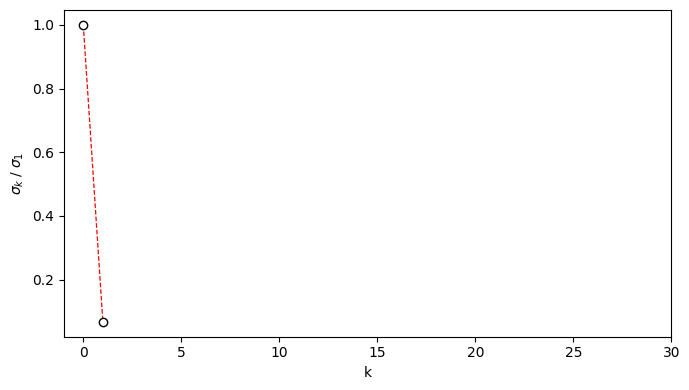

In [12]:
plt.figure(figsize=(7, 4))
x = range(len(s))
s = s / s[0]
plt.plot(x[:30], s[:30], color='red', linestyle='dashed', linewidth=0.9)
plt.scatter(x[:30], s[:30], marker='o', facecolor='white', edgecolors='k', color="C0", zorder=3)
plt.ylabel(f'$\sigma_k\; /\; \sigma_1$')
plt.xlabel(f'k')
plt.xlim(-1, 30)
plt.tight_layout()

(2.15) **KDE Suave.** La imagen del perro es demasiado grande, así que en su lugar creamos un ejemplo artificial de una suma de gaussianas 2D para demostrar cómo un número relativamente bajo de capas en la descomposición SVD proporciona la mayoría de la información en una matriz. Los valores singulares no nulos ocupan una pequeña franja brillante en la parte superior izquierda del gráfico central. Además, los primeros vectores singulares parecen significativos, mientras que el resto se parecen cada vez más a ruido; estos son los vectores singulares que reconstruyen la mayor parte de la estructura significativa en la matriz. Esto no ocurre en el caso de una matriz aleatoria donde no hay una estructura de baja dimensión o bajo rango.


In [ ]:
from src.utils import plot_svd_scree

np.random.seed(0)

# 50 parece un buen número
A = np.zeros([28, 28])

# Crear un KDE con 10 gaussianas
x = np.arange(28)
y = np.arange(28)
xx, yy = np.meshgrid(x, y)

z  = np.exp((-(-xx -  3)**2 - (yy - 2)**2)/10.0)
h1 = np.random.choice(np.arange(28), 15)
h2 = np.random.choice(np.arange(28), 15)
h3 = np.random.choice(np.arange(2, 28), 15)
for (x, y, t) in zip(h1, h2, h3):
    z += np.exp((-(xx - x)**2 - (yy - y)**2)/(2*t))

plot_svd_scree(z)
plt.savefig("../img/kde-decomp.png")


In [13]:

from src.utils import plot_svd_scree

np.random.seed(0)

# 50 parece un buen número
A = np.zeros([28, 28])

# Crear un KDE con 10 gaussianas
x = np.arange(28)
y = np.arange(28)
xx, yy = np.meshgrid(x, y)

z  = np.exp((-(-xx -  3)**2 - (yy - 2)**2)/10.0)
h1 = np.random.choice(np.arange(28), 15)
h2 = np.random.choice(np.arange(28), 15)
h3 = np.random.choice(np.arange(2, 28), 15)
for (x, y, t) in zip(h1, h2, h3):
    z += np.exp((-(xx - x)**2 - (yy - y)**2)/(2*t))

plot_svd_scree(z)
plt.savefig("../img/kde-decomp.png")

ModuleNotFoundError: No module named 'src'



(2.16) **Estructura de baja dimensión.** Una característica de la perspectiva de capas es que revela la estructura de bajo rango de $\mathbf A$ en términos de $\mathbf A_k = \sum_{j=1}^k \sigma_j \mathbf u_j \mathbf v_j^\top$ como una aproximación de rango $k$ de $\mathbf A$. Recuerda que puede suceder que $k \ll \min(m, n)$ mientras que $\sum_{j = 1}^k \sigma_j \approx \sum_{j = 1}^{\min(m, n)} \sigma_j$. Esto se demostró anteriormente en el ejemplo de la imagen del perro, donde la suma de las primeras capas da una buena aproximación a la imagen. En este caso, decimos que la imagen tiene una estructura de baja dimensión que podemos aproximar utilizando las primeras $k$ capas con los valores singulares más fuertes.


(2.17) **Teorema de Eckart-Young.** En el punto anterior, discutimos el concepto de aproximación de bajo rango. Sabiendo que $\mathbf A$ tiene una estructura de bajo rango a partir del gráfico de scree, ¿hay una mejor aproximación que la natural $\mathbf A_k$? Resulta que, según el teorema de Eckart-Young, no la hay:

  > (Eckart-Young). Si $\mathbf B$ es una matriz de rango $k$, entonces $\lVert \mathbf A - \mathbf B \rVert \geq \lVert \mathbf A - \mathbf A_k \rVert.$ 

  Nota que la norma $\lVert \cdot \rVert$ utilizada aquí es la norma del operador definida en la siguiente sección.



**Demostración.** Deja que $\mathbf v_1, \ldots, \mathbf v_n$ sean los vectores singulares derechos de $\mathbf A$. Nota que $\dim \mathsf{N}(\mathbf B) = n-k$ (teorema del rango y nulidad) y $\dim \mathsf{C}(\mathbf v_1, \ldots, \mathbf v_{k+1}) = k+1$. Deja que $\mathbf u_1, \ldots, \mathbf u_{n-k}$ sean una base de $\mathsf{N}(\mathbf B)$. Entonces, las dimensiones de los dos subespacios suman $n + 1$. Se sigue que existe $j$ tal que $\mathbf u_j = a_1\mathbf u_1 + \ldots a_{j-1}\mathbf u_{j-1} + \sum_{i=1}^{k+1}c_i\mathbf v_i$ donde $c_i$ no son todos cero. De lo contrario, $\mathbf u_j$ es una combinación lineal de los vectores anteriores. Deja que $\mathbf u = \mathbf u_j - \sum_{l=1}^{j-1}c_l\mathbf u_l.$ Así, $\mathbf u = \sum_{j=1}^{k+1} c_i \mathbf v_i$ y $\mathbf B \mathbf u = \mathbf 0.$ Reescala los coeficientes para que $\mathbf u$ sea un vector unitario. Entonces,
    $$
    \|\mathbf A-\mathbf B\|^{2} \geq\|(\mathbf A-\mathbf B) \mathbf u\|^{2}=\|\mathbf A \mathbf u \|^{2}=\sum_{i=1}^{k+1} {c_i}^2 {\sigma_{i}}^{2} \geq \sigma_{k+1}^{2} \sum_{i=1}^{k+1}{c_i}^2 = \sigma_{k+1}^{2}.
    $$

Sabemos que $\|\mathbf A-\mathbf A_k\| = \sigma_{k+1}$ ya que esta es simplemente la matriz obtenida reemplazando los primeros valores singulares por cero, es decir, aplanando los primeros $k$ ejes de la elipse. Se sigue que $\|\mathbf A-\mathbf B\| \geq \|\mathbf A-\mathbf A_k\|.$ □


(2.18) **Desafío de código:** Generar matriz aleatoria con número de condición 42.



In [14]:

n = 42

# Obtener SVD de una matriz aleatoria
np.random.seed(0)
A = np.random.randn(n, n)
U, s, VT = np.linalg.svd(A)

# Reescalar: f(σ) = aσ + b, tal que f(σ_0) = 42, y f(σ_n) = 1 
a = -41.0 / (s[-1] - s[0])
b = 42 - a * s[0]
s = a * s + b

# Nueva matriz aleatoria con número de condición κ = 42
B = U @ np.diag(s) @ VT
s = np.linalg.svd(B)[1]
print(f'κ = {s[0] / s[-1] :.3f}')



κ = 42.000
